In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wolves_in_silico.pop.game import Game

In [17]:
# run model multiple times and return fraction of civilian wins and play time of eacht replicate
def run_model(nciv, nwolf, nrep, use_mayor=True):
    n_civ_win = 0
    play_time = []
    for n in range(nrep):
        game = Game(nciv, nwolf)
        if not use_mayor:
            game.village.change_mayor_vote(0)
        result = game.play()
        n_civ_win += int(result.civ_win)
        play_time.append(result.time[-1])
    return n_civ_win/nrep, play_time

def run_experiment(nrep, use_mayor=False):
    nplayer_list = np.arange(8, 25, 2)
    wolf_frac_list = np.linspace(0.05, 0.3, 11)
    wins = pd.DataFrame(columns=['players', '% wolfs', '% civ wins'])
    play_times = pd.DataFrame(columns=['players', '% wolfs', 'play time'])
    for nplayers in nplayer_list:
        nwolf_list = np.unique(np.ceil(wolf_frac_list*nplayers))
        perc_wins = []
        for nwolf in nwolf_list:
            frac_win, play_time = run_model(nciv=nplayers-nwolf, nwolf=nwolf, nrep=nrep, use_mayor=use_mayor)
            perc_wins.append(frac_win*100)
            pt_data = np.column_stack((nrep*[nplayers], nrep*[100*nwolf/nplayers], play_time))
            play_times = pd.concat((play_times, pd.DataFrame(data=pt_data, columns=play_times.columns)))
        win_data = np.column_stack((nplayers*np.ones(len(nwolf_list)), 100*nwolf_list/nplayers, perc_wins))
        wins = pd.concat((wins,pd.DataFrame(data=win_data, columns=wins.columns)))
    return wins, play_times
                         

# With typical mayor majority rule

For this analysis we run a simple population model with the following assumptions:
* at day 0 a mayor is appointed at random and then the night starts;
* every **night** a random civilian is killed;
* every **day** a random player is killed;
* when the day or night kill eliminates the mayor, a new mayor is appointed at random.

Win conditions:
* civilians win when all wolves are killed;
* wolves win when they have a voting majority with mayor counting as 1.5

Note that using the mayor is quite odd because it only affects the win condition.

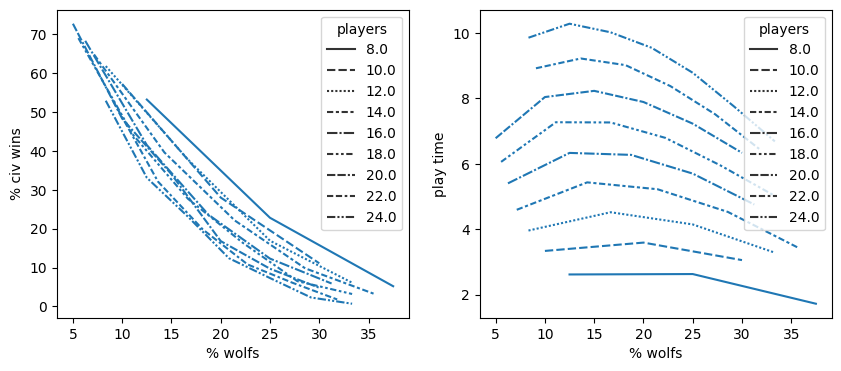

In [15]:
wins, play_times = run_experiment(1000, use_mayor=True)
fig, axes = plt.subplots(1,2, figsize=(10,4));
sns.lineplot(data=wins, x='% wolfs', y='% civ wins', style='players', ax=axes[0]);
sns.lineplot(data=play_times, x='% wolfs', y='play time', style='players', errorbar=None, ax=axes[1]);

Above we plot the percentage of civilian wins against the fraction of wolfs (left) for a range of player counts. The advantage of the wolf group is very high in such a random game. On the right we plot the play time (in days) for the same parameters. Interestingly, there is an optimum wolf fraction when it comes to play time and this optimum shifts with the number of player. 

# Without mayor majority rule

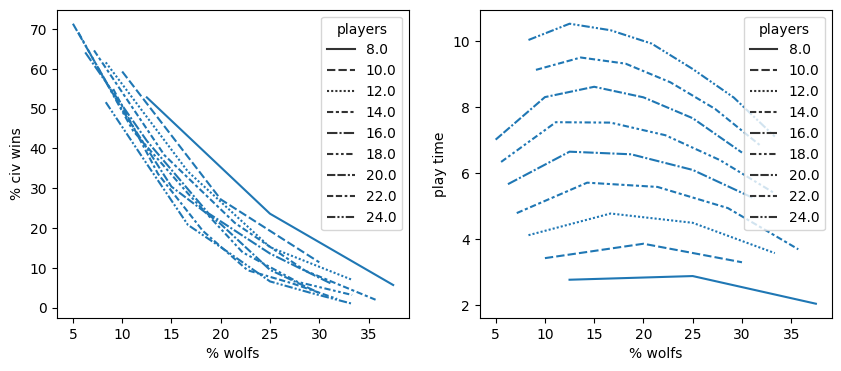

In [18]:
wins, play_times = run_experiment(1000, use_mayor=False)
fig, axes = plt.subplots(1,2, figsize=(10,4));
sns.lineplot(data=wins, x='% wolfs', y='% civ wins', style='players', ax=axes[0]);
sns.lineplot(data=play_times, x='% wolfs', y='play time', style='players', errorbar=None, ax=axes[1]);

Lifting the mayor majority rule has no significant effects on the outcome.

# Conclusion

This population based model doesn't show anything highly unexpected. However, some dynamics are missing. Wolves know who wolves are and do not kill wolves during the night. However civilians and wolves do not consider any knowledge during the day round. For example: assume we have 2 civilians and 1 wolf. The current model assumes a 2/3 chance of killing a civilian and a 1/3 chance of killing a wolf. However,

